**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
# Print first five rows in datafram
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic information of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking thr number of missin values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**

1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.select_dtypes(include=['number']).corr()

<Axes: >

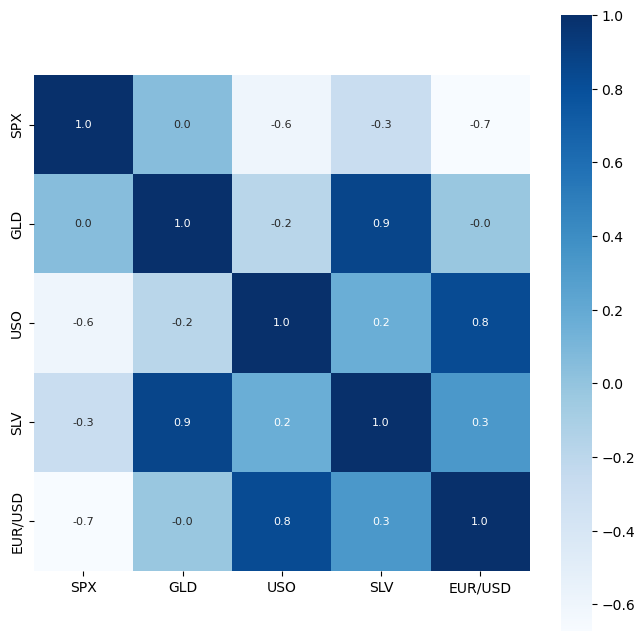

In [10]:
# constricting a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',
           annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

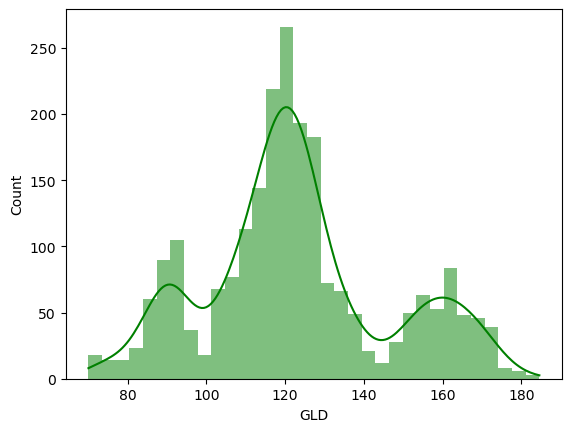

In [12]:
# checking the distribution of the GLD price
sns.histplot(gold_data['GLD'], color = 'green', kde = True,
            edgecolor = None)

**Splitting the Features and Target**

In [13]:
X = gold_data.drop(columns = ['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

**Splitting into Training data and Test data**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                        test_size = 0.2, random_state = 2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


**Model Training: Random Forest Regressor**

The Random Forest Regressor is a powerful ensemble learning algorithm based on decision trees, designed for regression tasks. It works by building multiple decision trees during training and averaging their predictions to provide a more accurate and robust output. This method helps reduce overfitting, a common issue with individual decision trees, and improves generalization.

Each tree in the forest is trained on a random subset of the data (using bootstrap sampling), and at each split, a random subset of features is considered. This randomness ensures diversity among the trees, which is critical for the ensemble's performance. Random Forest is known for handling large datasets with high-dimensional features, dealing well with missing data, and being less sensitive to hyperparameter tuning. While it may not always be as interpretable as a single decision tree, its strength lies in its accuracy and robustness across various datasets.

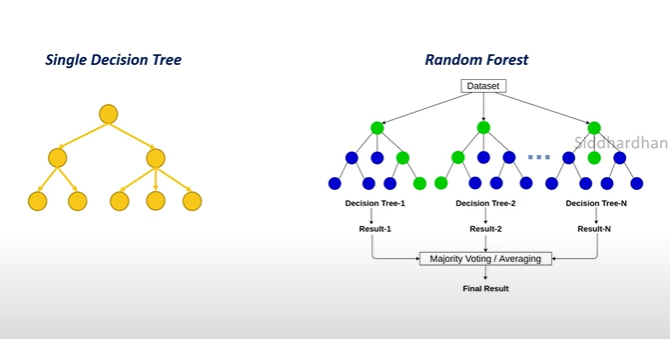

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [20]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
test_data_prediction

array([168.63459934,  81.99929982, 116.10590064, 127.6382006 ,
       120.68570126, 154.74569827, 149.95169858, 126.15170043,
       117.44099883, 126.09350031, 116.66080124, 171.25310105,
       141.54029789, 167.74349851, 115.33240016, 117.69560025,
       138.64800338, 170.15770072, 160.02320278, 157.83349916,
       155.16250036, 125.24530024, 175.75209926, 157.27260363,
       125.24170034,  93.76869957,  78.23019987, 120.7930998 ,
       119.08869918, 167.56469925,  88.02720041, 125.33110046,
        91.13640072, 117.60570022, 121.21699941, 136.37060063,
       115.58830118, 115.02720112, 147.05019974, 107.06130104,
       104.26770254,  87.16689804, 126.56090016, 117.91440003,
       153.53489853, 119.84929965, 108.32540015, 108.10839834,
        93.0540003 , 127.04509785,  74.41330066, 113.75609936,
       121.24229997, 111.20809931, 118.80979877, 120.43179941,
       157.79339971, 170.47390063, 147.06059677,  85.72649867,
        94.38130034,  86.78129844,  90.49379993, 119.07

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.9887333074748034


**Compare the Actual values and Predicted value in a plot**

In [23]:
Y_test = list(Y_test)

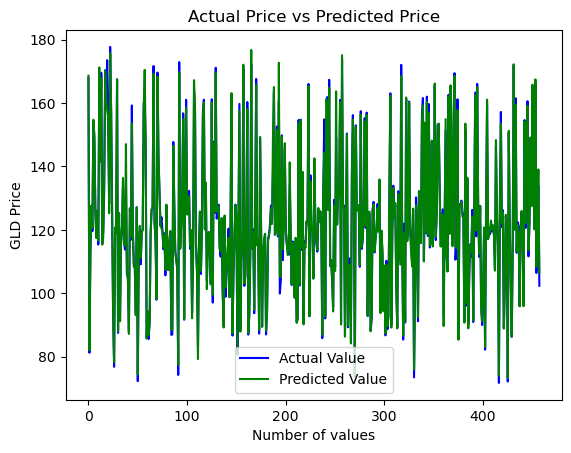

In [24]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green',
        label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()